In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams

In [2]:
rcParams['figure.figsize'] = 14,28

In [3]:
from ImageHandler import *
from ImageProcessing import *
from Processing import *

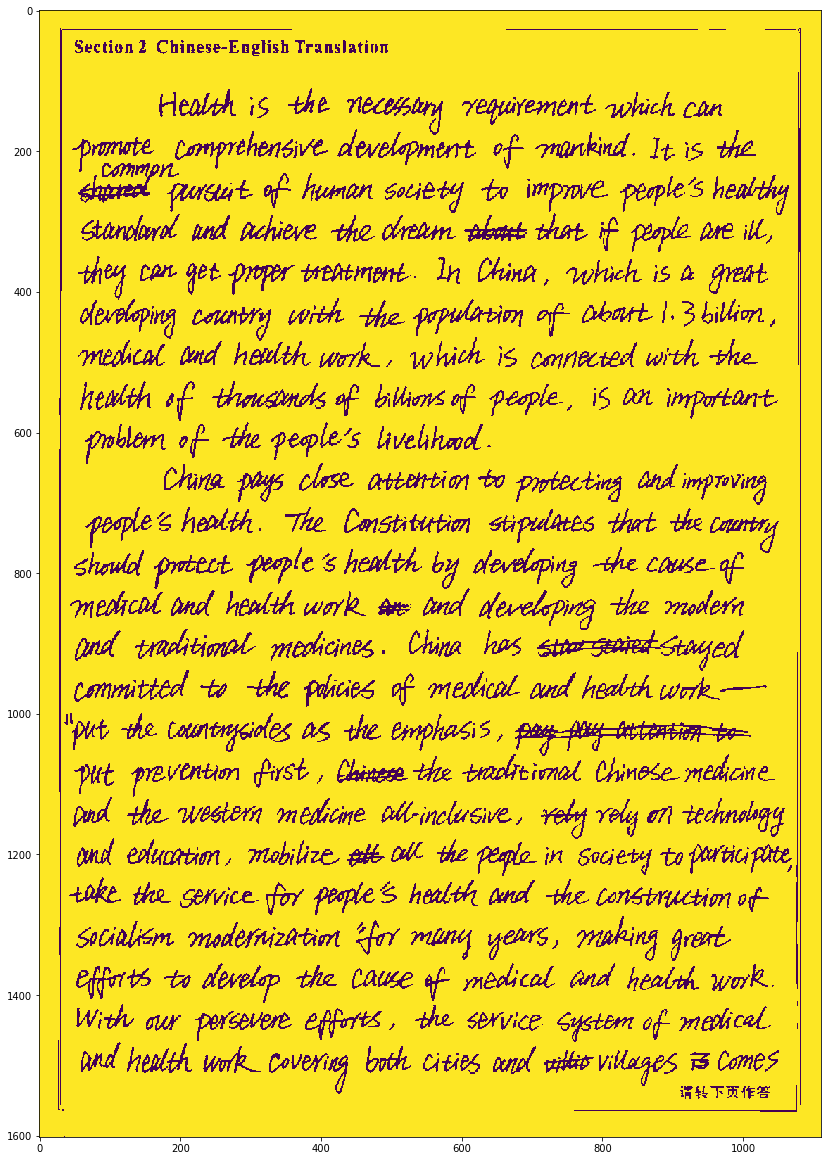

In [4]:
image = loadImage('Test-data/050200074.jpg');
(h, w) = np.shape(image);
_, image = cv.threshold(image,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(image);

In [5]:
width = int (0.05 * w);
(h, w) = np.shape(image);
strips = (int (w/width) + (1 if w%width != 0 else 0));
M = 1;

wt = getWeights(M);
pp = [];
for i in range(strips):
    pp.append(projectionProfile(image, width, i));

delta = getdelta(image, width, strips, pp);
SPR = [];
for i in range(strips):
    SPR.append(getSPR(image, M, i, delta, wt, pp, strips));
    
dSPR = [];
CCheight = getCCHeight(image);
for i in range(strips):
    dSPR.append(getdiffSPR(SPR[i], image, CCheight));

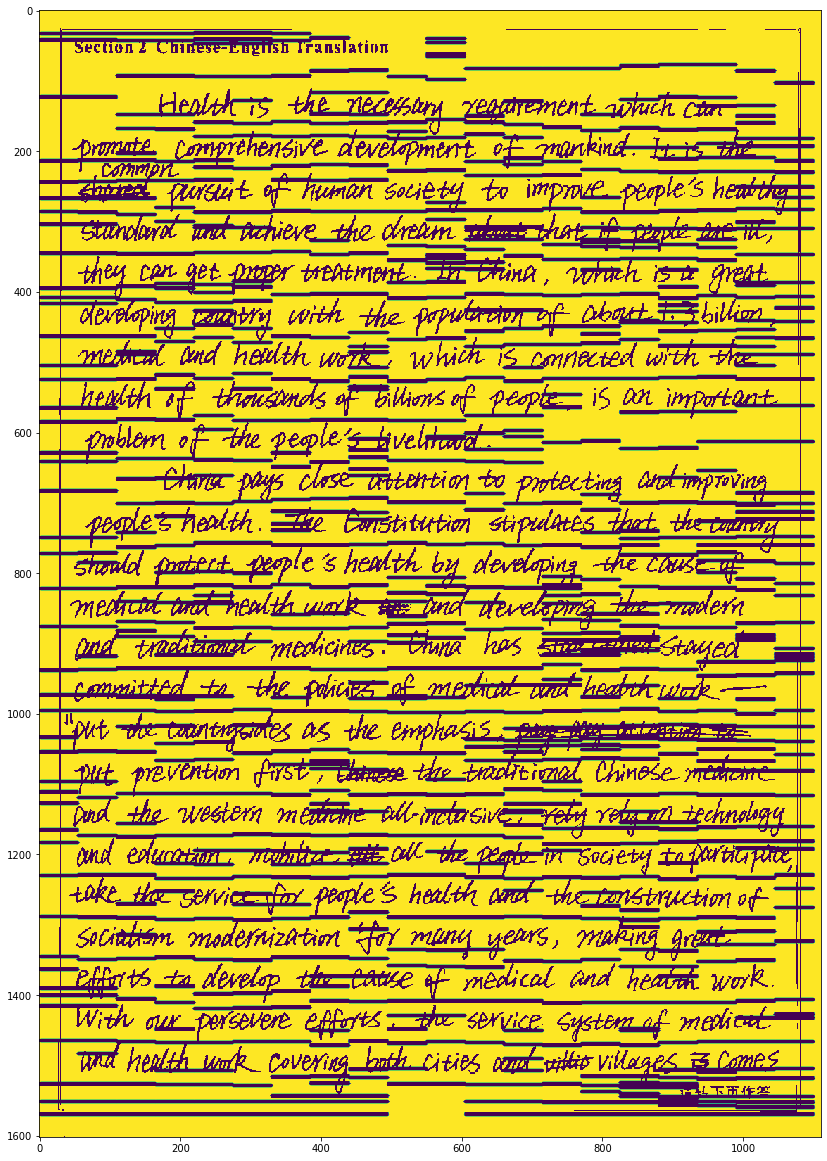

In [6]:
showLine(image, dSPR, strips, width);

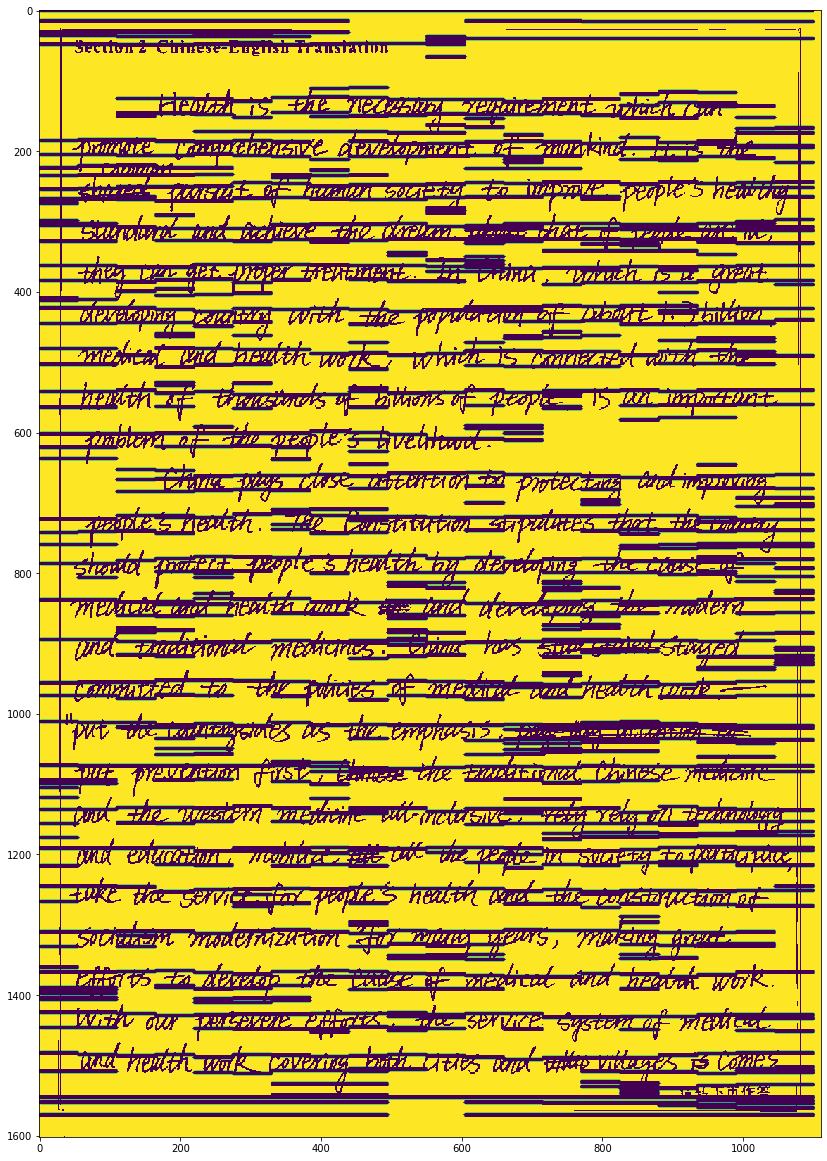

In [7]:
nRegions = applyViterbi(dSPR, strips, pp, width, CCheight, w)
showRegions(image, nRegions, width, w);